<a href="https://colab.research.google.com/github/p1ll3chan/ML_regression_model/blob/main/ML_Project_Done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4 scikit-learn==1.3.2 joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 72.8 MB/s eta 0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.4
    Uninstalling numpy-2.3.4:
      Successfully uninstalled numpy

In [ ]:
pip install numpy==1.26.4 --force-reinstall


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.3.2 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incom

In [9]:
# Cell 1 - Imports
# (Colab usually has these; run to ensure everything is available)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Cell 2 - Upload dataset manually (Colab)
from google.colab import files
uploaded = files.upload()   # Click "Choose Files" and pick your auto-mpg.csv

# After upload, read the CSV (replace filename if different)
import io
fname = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[fname]))
print(f"Loaded: {fname}  — shape: {df.shape}")
df.head()


Saving auto-mpg.csv to auto-mpg (2).csv
Loaded: auto-mpg (2).csv  — shape: (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [11]:
# Cell 3 - Clean & convert target
# Rename columns to consistent names (handles variations)
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Convert mpg to km per liter
conv_factor = 1.609344 / 3.785411784   # exact conversion factor
df['kml'] = df['mpg'] * conv_factor

# Drop car name (we decided not to use it)
if 'car_name' in df.columns:
    df = df.drop(columns=['car_name'])
elif 'car name' in df.columns:
    df = df.drop(columns=['car name'])

# Ensure horsepower numeric if needed
if 'horsepower' in df.columns:
    df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Show cleaned head and info
print("After cleaning, columns:\n", df.columns.tolist())
df.describe().T


After cleaning, columns:
 ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'kml']


,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.000000,17.500000,23.000000,29.000000,46.600000
cylinders,398.0,5.454774,1.701004,3.000000,4.000000,4.000000,8.000000,8.000000
displacement,398.0,193.425879,104.269838,68.000000,104.250000,148.500000,262.000000,455.000000
horsepower,392.0,104.469388,38.491160,46.000000,75.000000,93.500000,126.000000,230.000000
weight,398.0,2970.424623,846.841774,1613.000000,2223.750000,2803.500000,3608.000000,5140.000000
acceleration,398.0,15.568090,2.757689,8.000000,13.825000,15.500000,17.175000,24.800000
model_year,398.0,76.010050,3.697627,70.000000,73.000000,76.000000,79.000000,82.000000
origin,398.0,1.572864,0.802055,1.000000,1.000000,1.000000,2.000000,3.000000
kml,398.0,9.997073,3.322917,3.826293,7.440015,9.778305,12.329168,19.811697


In [12]:
# Cell 4 - Features and split
features = ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
target = 'kml'

# If some feature names differ (e.g., 'model year'), try to fix
if 'model_year' not in df.columns and 'model_year' not in features:
    # try alternate column name
    for alt in ['model_year','model year','year']:
        if alt in df.columns:
            df = df.rename(columns={alt:'model_year'})
            break

X = df[features].copy()
y = df[target].copy()

# Drop rows with NA in features/target
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask].reset_index(drop=True)
y = y[mask].reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (313, 7) Test shape: (79, 7)


In [14]:
# Cell 5 - Preprocessing
numeric_features = ['cylinders','displacement','horsepower','weight','acceleration','model_year']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

categorical_features = ['origin']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Changed sparse to sparse_output
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [15]:
# Cell 6 - Models dictionary
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01, max_iter=5000),
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42)
}

# Train each model, evaluate, and save pipelines
results = []
trained_pipes = {}

for name, model in models.items():
    pipe = Pipeline(steps=[('pre', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({'model': name, 'r2': r2, 'mae': mae, 'mse': mse, 'rmse': rmse})
    trained_pipes[name] = pipe
    # Optional: save model to disk in Colab runtime
    joblib.dump(pipe, f"{name}_pipeline.joblib")

results_df = pd.DataFrame(results).sort_values('rmse')
results_df


,model,r2,mae,mse,rmse
3,RandomForest,0.890646,0.704837,1.008842,1.004411
2,Lasso,0.792851,1.047331,1.911038,1.382403
1,Ridge,0.792648,1.045555,1.912911,1.383080
0,LinearRegression,0.792277,1.046704,1.916332,1.384316


In [16]:
# Cell 7 - Display comparison with nicer formatting
results_df[['model','r2','mae','rmse']].style.format({
    'r2': '{:.4f}',
    'mae': '{:.4f}',
    'rmse': '{:.4f}'
})


,model,r2,mae,rmse
3,RandomForest,0.8906,0.7048,1.0044
2,Lasso,0.7929,1.0473,1.3824
1,Ridge,0.7926,1.0456,1.3831
0,LinearRegression,0.7923,1.0467,1.3843


        feature  importance
1  displacement    0.407080
2    horsepower    0.169799
0     cylinders    0.148275
3        weight    0.139275
5    model_year    0.104674
4  acceleration    0.024590
8      origin_3    0.002454
7      origin_2    0.002077
6      origin_1    0.001775


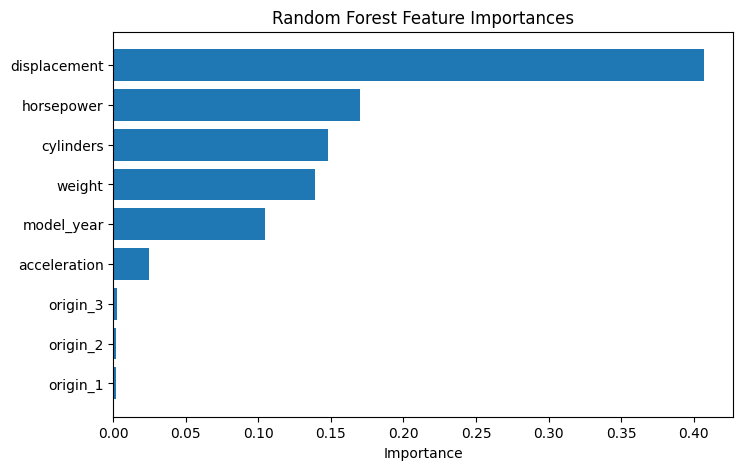

In [17]:
# Cell 8 - Feature importance for RandomForest
best_rf = trained_pipes.get('RandomForest')
if best_rf is not None:
    # Extract feature names produced by ColumnTransformer
    # numeric then onehot origin columns
    num_cols = numeric_features
    # get onehot feature names
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    ohe_cols = [f"origin_{int(x)}" for x in ohe.categories_[0]]
    feature_names = num_cols + ohe_cols
    # get importance from RandomForest model inside pipeline
    rf_model = best_rf.named_steps['model']
    importances = rf_model.feature_importances_
    fi = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)
    print(fi)
    # Plot
    plt.figure(figsize=(8,5))
    plt.barh(fi['feature'], fi['importance'])
    plt.gca().invert_yaxis()
    plt.title('Random Forest Feature Importances')
    plt.xlabel('Importance')
    plt.show()
else:
    print("RandomForest model not found.")


Best model by RMSE: RandomForest


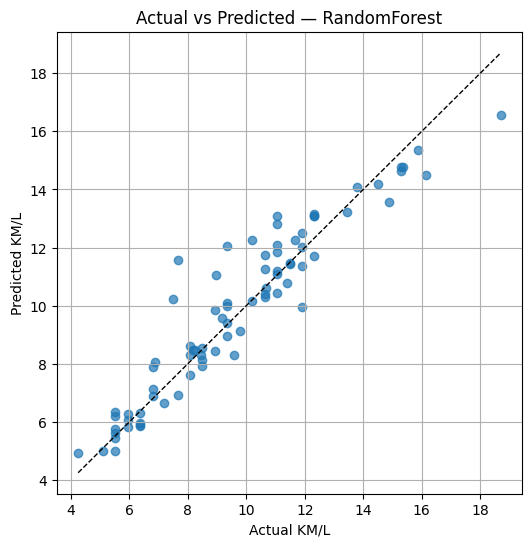

RandomForest  —  R2: 0.8906, MAE: 0.7048 km/l, RMSE: 1.0044 km/l


In [18]:
# Cell 9 - Choose best model by RMSE and plot actual vs predicted
best_model_name = results_df.iloc[0]['model']
print("Best model by RMSE:", best_model_name)
best_pipe = trained_pipes[best_model_name]
y_pred = best_pipe.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=1)
plt.xlabel('Actual KM/L')
plt.ylabel('Predicted KM/L')
plt.title(f'Actual vs Predicted — {best_model_name}')
plt.grid(True)
plt.show()

# Print a small error summary for the best model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"{best_model_name}  —  R2: {r2:.4f}, MAE: {mae:.4f} km/l, RMSE: {rmse:.4f} km/l")


In [19]:
# Cell 10 - Save results table to CSV in Colab VM (downloadable)
results_df.to_csv('model_results_kml.csv', index=False)
print("Saved model_results_kml.csv — download from Colab Files panel if needed.")


Saved model_results_kml.csv — download from Colab Files panel if needed.
